In [144]:
#test to see if this goes on Emily's branch AND Reid's branch or just Reid's branch

## Data Analysis and Cleaning

In [326]:
#all required imports
import pandas as pd
import sqlite3
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import gzip
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [327]:
#Data files extracting
FP1 = 'zippedData/rt.reviews.tsv.gz' #rotten tomatoes - no movie titles? where to get?
FP2 = 'zippedData/rt.movie_info.tsv.gz' #rotten tomatoes - no movie titles? where to get?
FP3 = 'zippedData/bom.movie_gross.csv.gz' #box office mojo studio and revenues / budgets for films - connect to other DB? This one vs. TN?
FP4 = 'zippedData/tmdb.movies.csv.gz' #the movies database - has vote counts and vote averages from the people vs. critics
FP5 = 'zippedData/tn.movie_budgets.csv.gz' #finanial data
#FP6 = 

#rotten tomatoes reviews file to pd_dataframe
#with gzip.open(FP1, 'rt') as f1:
#    rt_review = pd.read_csv(f1, delimiter='\t')
rt_review = pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t', encoding='latin-1')


#rotten tomatoes info file to pd_dataframe   
#with gzip.open(FP2, 'rt') as f2:
    #rt_info = pd.read_csv(f2, delimiter='\t')    

rt_info = pd.read_csv('zippedData/rt.movie_info.tsv', delimiter='\t')

#box office mojo file to pd_dataframe
#with gzip.open(FP3, 'rt') as f3:
 #   bom_df = pd.read_csv(f3)

bom_df = pd.read_csv('zippedData/bom.movie_gross.csv')

#The Movie DB file to pd_dataframe
#with gzip.open(FP4, 'rt', encoding='utf-8') as f4:
 #   tmdb_df = pd.read_csv(f4, index_col='Unnamed: 0') #there is a column that holds the index value, setting as index

tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv')

#The Numbers file to pd_dataframe
#with gzip.open(FP5, 'rt', encoding='utf-8') as f5:
 #   tn_df = pd.read_csv(f5)
    
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv')
    
#merging the two rotten tomatoes databases together for analysis
total_rt = pd.merge(rt_info, rt_review, on='id', how='outer')

#IMDb file to SQL connection
#zip_file_path = 'zippedData/im.db.zip'
#extracted_db_path = 'im.db'

#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
 #   zip_ref.extractall(extracted_db_path)

path = 'zippedData/im.db'
conn = sqlite3.connect(path)

#conn = sqlite3.connect("im.db/im.db")
#cur = conn.cursor()

## Reviewing the Dataframes

In [334]:
#reviewing the size of the data:

print('rotten tomatoes reviews: '+str(rt_review.shape))
print('rotten tomatoes info: '+str(rt_info.shape))
print('Box Office Mojo: '+str(bom_df.shape))
print('TMDb reviews: '+str(tmdb_df.shape))
print('TN DB reviews: '+str(tn_df.shape))


rotten tomatoes reviews: (54432, 8)
rotten tomatoes info: (1560, 12)
Box Office Mojo: (3387, 5)
TMDb reviews: (26517, 10)
TN DB reviews: (5782, 6)


In [340]:
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [342]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [330]:
rt_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [329]:
#starting with The Numbers Database:
tn_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [149]:
#cleaning tn_df for financial data, time-series data, and creating a profit column

tn_df['domestic_gross'] = tn_df['domestic_gross'].astype(str).str.replace(',','')
tn_df['domestic_gross'] = tn_df['domestic_gross'].astype(str).str.replace('$','')
tn_df['production_budget'] = tn_df['production_budget'].astype(str).str.replace(',','')
tn_df['production_budget'] = tn_df['production_budget'].astype(str).str.replace('$','')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].astype(str).str.replace(',','')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].astype(str).str.replace('$','')

tn_df['domestic_gross'] = pd.to_numeric(tn_df['domestic_gross'], downcast = 'integer')
tn_df['production_budget'] = pd.to_numeric(tn_df['production_budget'], downcast = 'integer')
tn_df['worldwide_gross'] = pd.to_numeric(tn_df['worldwide_gross'], downcast = 'integer')

tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])
tn_df['release_month'] = tn_df['release_date'].dt.month

tn_df['profit'] = tn_df['worldwide_gross'] - tn_df['production_budget']

In [150]:
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,12,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,999721747
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,12,-7000
5778,79,1999-04-02,Following,6000,48482,240495,4,234495
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,7,-3662
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,9,-1400


In [151]:
#Reviewing The Movies Database - to be merged with The Numbers database
tmdb_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


# REID TO CREATE ROI COLUMN IN MERGED_DF

In [152]:
tmdb_columns = ['title', 'popularity', 'vote_average', 'vote_count']

# Merge the DataFrames
merged_df = pd.merge(tn_df, tmdb_df[tmdb_columns], left_on='movie', right_on='title', how='inner')

# Drop the 'title' column from merged_df bc we are keeping the 'movie' column
merged_df.drop('title', axis=1, inplace=True)

# Display the merged DataFrame
merged_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,profit,popularity,vote_average,vote_count
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,12,2351345279,26.526,7.4,18676
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,635063875,30.579,6.4,8571
2,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,1072413963,44.383,7.3,13457
3,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,4,1748134200,80.773,8.3,13948
4,9,2017-11-17,Justice League,300000000,229024295,655945209,11,355945209,34.953,6.2,7510


In [153]:
merged_df.rename(columns={'vote_average': 'TMDb_rating', 'vote_count': 'TMDb_vote_count', 'popularity': 'TMDb_popularity'}, inplace=True)

In [154]:
merged_df.shape

(2385, 11)

### Rotten Tomatoes Database - combined

In [155]:
total_rt.head()

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0.0,Patrick Nabarro,"November 10, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0.0,io9.com,"May 23, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0.0,Stream on Demand,"January 4, 2018"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0.0,MUBI,"November 16, 2017"


In [156]:
total_rt.columns

Index(['id', 'synopsis', 'rating_x', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio', 'review', 'rating_y', 'fresh', 'critic', 'top_critic',
       'publisher', 'date'],
      dtype='object')

In [157]:
#cleaning the runtime column
total_rt['runtime'] = total_rt['runtime'].replace(to_replace=' minutes', value='', regex=True)
total_rt['runtime'] = pd.to_numeric(total_rt['runtime'], downcast = 'integer')

#converting date columns to date-time format
total_rt['theater_date'] = pd.to_datetime(total_rt['theater_date'])
total_rt['dvd_date'] = pd.to_datetime(total_rt['dvd_date'])
total_rt['date'] = pd.to_datetime(total_rt['date'])

#creating time length in theaters
total_rt['timespan'] = (total_rt['dvd_date'] - total_rt['theater_date']).dt.days

#converting box office revenue to an integer
total_rt['box_rev'] = total_rt['box_office'].replace(to_replace=',', value='', regex=True)
total_rt['box_rev'] = pd.to_numeric(total_rt['box_rev'], downcast = 'integer')

In [158]:
total_rt['runtime'].value_counts()

runtime
115.0    2082
108.0    2030
95.0     1803
119.0    1720
98.0     1456
         ... 
13.0        1
23.0        1
6.0         1
313.0       1
290.0       1
Name: count, Length: 142, dtype: int64

In [159]:
print(total_rt['rating_y'][1])
type(total_rt['rating_y'][1])

3/5


str

In [160]:
#cleaning the ratings column
#step 1. taking letter grades and applying fraction out of 15 (A-F + and -)
grades = {
    'A+': 15/15,
    'A': 14/15,
    'A-': 13/15,
    'B+': 12/15,
    'B': 11/15,
    'B-': 10/15,
    'C+': 9/15,
    'C': 8/15,
    'C-': 7/15,
    'D+': 6/15,
    'D': 5/15,
    'D-': 4/15,
    'F+': 3/15,
    'F': 2/15,
    'F-': 1/15
}

# Function to convert fractions to decimals
def frac_to_decimal(frac_str):
    try:
        numerator, denominator = map(float, frac_str.split('/'))
        if denominator == 0:
            return None  # Handle division by zero
        return numerator / denominator
    except ValueError:
        return None  # Handle invalid fraction format

# Apply the conversion function to the 'Fraction' column
#df['Decimal'] = df['Fraction'].apply(frac_to_decimal)

#creating new numeric rating column
total_rt['Numeric_rating'] = None

for index, row in total_rt.iterrows():
    rating = row['rating_y']
    if rating in grades:
        numeric_rating = grades[rating]
        total_rt.at[index, 'Numeric_rating'] = numeric_rating
    elif '/' in str(rating): #I think this is going to break the code?
        try:
            numeric_value = frac_to_decimal(rating)
            total_rt.at[index, 'Numeric_rating'] = numeric_value
        except ValueError:
            pass  # skip non-fraction rated rows   
    else:
        continue    
    

In [161]:
total_rt['Numeric_rating'][1]# = pd.to_numeric(total_rt['rating_y'], downcast = 'float')

0.6

### Merging SQL with other databases:

In [162]:
#Reid to merge merged_df with certain databases below

#merge with imdbdf, 

#df2 has thegenres broken out - merge the df with start month on this to create a line graph for best genre by month etc.

#

# Stats Section:

### Questions to answer:

Visualizations:
    - Best time of year to release movies (by month), genre by month or total by genre (Reid)
    - rating by run-time, profitability/ROI by run-time (Reid)
    - rating vs. profitability/ROI, is there any correlation (Reid)
    - top 5-10 writers/directors list (emily)
   
   Stats questions:
     - Genre vs. binned profitability - chi-squared test?
     - do writers who also produce have better rating compared to separate writers and directors - T-test (Emily)

## Emily Stat code section:

## Reid Stat code section:

# Visualizations

## Reid section (draft)

In [163]:
merged_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'release_month', 'profit', 'TMDb_popularity',
       'TMDb_rating', 'TMDb_vote_count'],
      dtype='object')

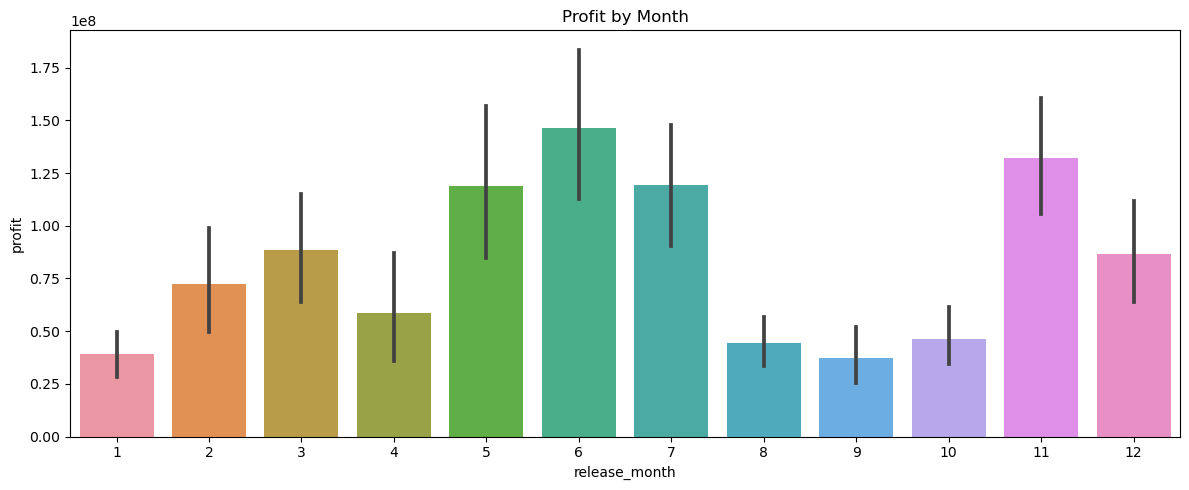

In [164]:
#best time to release a movie
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

#plot first bar chart
sns.barplot(x=merged_df['release_month'], y=merged_df['profit'])
ax.set_title('Profit by Month')

#plot second
#sns.barplot(x=merged_df.release_month, y=merged_df.profit, ax=[0,2])
#axes[1].set_title('Profit by Genre')

plt.tight_layout()
plt.show();

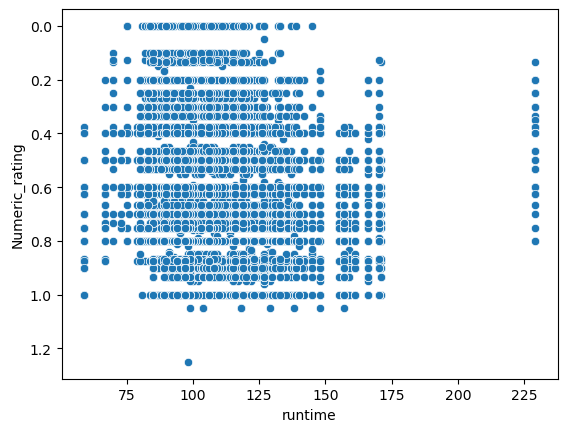

In [165]:
corr_df = total_rt[total_rt['timespan'] < (72*7)]
x = corr_df['timespan'].corr(corr_df['runtime'])
x
#Jurassic park was the film with longest box office time per BOM


sns.scatterplot(x=corr_df['runtime'], y=corr_df['Numeric_rating']);

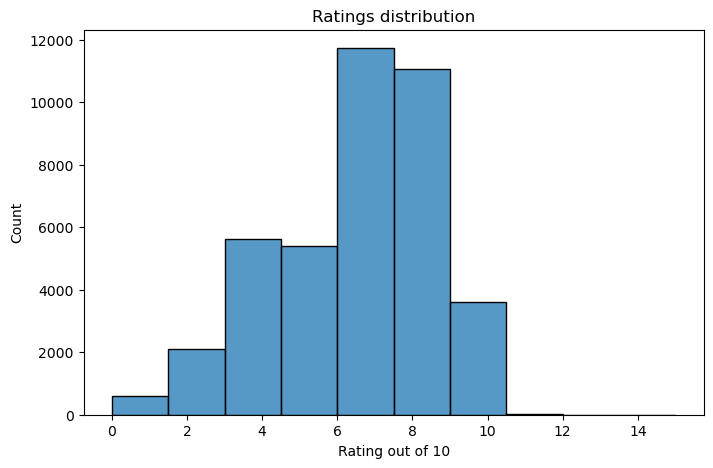

In [166]:
x = total_rt[total_rt['Numeric_rating'].notna()]['Numeric_rating'].apply(lambda x: x*10)
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.histplot(data=x, bins = 10)
ax.set_title('Ratings distribution')
ax.set_xlabel('Rating out of 10');

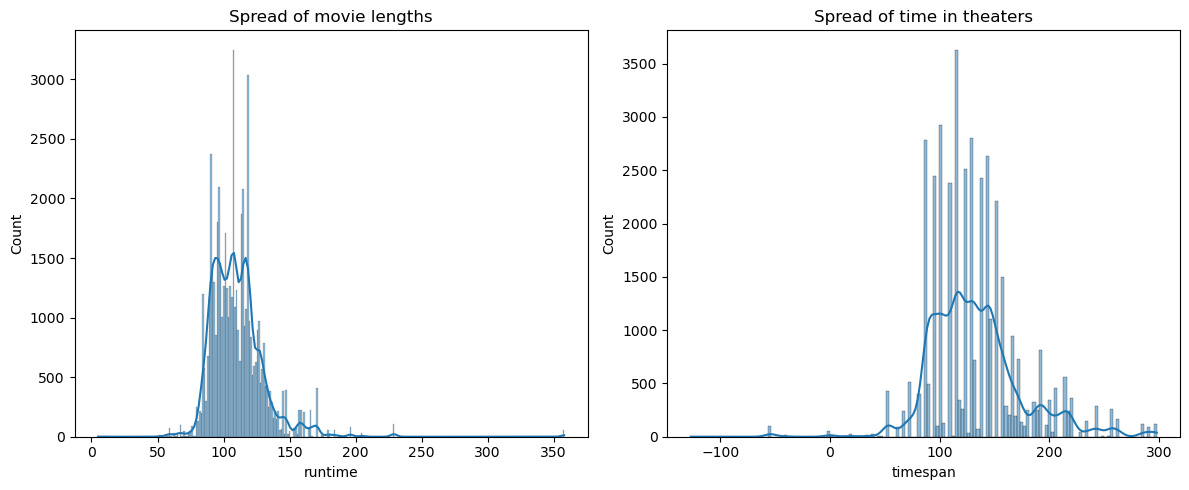

In [167]:
#is there anything to compare movie lengths to

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#plot first histogram
sns.histplot(data=total_rt['runtime'], kde=True, ax=axes[0])
axes[0].set_title('Spread of movie lengths')

#plot second
sns.histplot(data=total_rt[total_rt['timespan'] <300]['timespan'], kde=True, ax=axes[1])
axes[1].set_title('Spread of time in theaters')

plt.tight_layout()
plt.show();

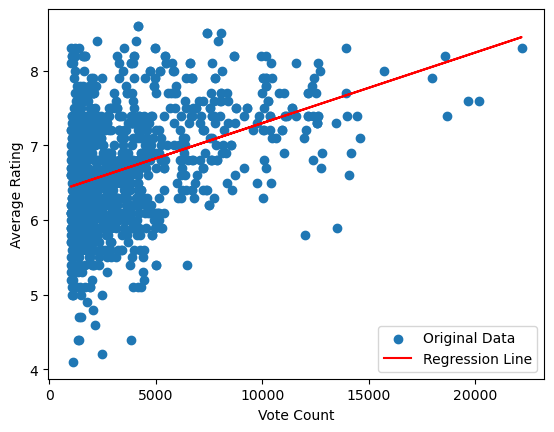

In [168]:
model = LinearRegression()
reg_df = tmdb_df[tmdb_df['vote_count'] > 1000]
X = reg_df[['vote_count']]
Y = reg_df['vote_average']
model.fit(X, Y)
intercept = model.intercept_
slope = model.coef_[0]

Y_pred = model.predict(X)

plt.scatter(X, Y, label='Original Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('Vote Count')
plt.ylabel('Average Rating')
plt.legend()
plt.show()

## Emily visualization section:

## Reading and analyzing the SQL Database from IMDb

## Emily's Code:

In [337]:
imdbdf = pd.read_sql(
    """
    SELECT *
    FROM movie_basics
    JOIN movie_ratings
        USING(movie_id)
    JOIN movie_akas
        USING(movie_id)

"""
, conn
)
imdbdf

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,Sangharsh,IN,hi,None,alternative transliteration,0.0
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,2,Sunghursh,None,None,original,None,1.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,3,Sunghursh,IN,None,None,None,0.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,4,Sunghursh,IN,hi,None,alternative transliteration,0.0
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,5,Sungharsh,IN,hi,None,alternative spelling,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261801,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600,2,Sisterleaf,IN,en,None,literal English title,0.0
261802,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600,3,Pengalila,IN,None,None,None,0.0
261803,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,1,Padmavyuhathile Abhimanyu,None,None,original,None,1.0
261804,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,2,Pathmavyuhathile Abhimanyu,IN,ml,None,alternative spelling,0.0


In [338]:
imdbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261806 entries, 0 to 261805
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           261806 non-null  object 
 1   primary_title      261806 non-null  object 
 2   original_title     261806 non-null  object 
 3   start_year         261806 non-null  int64  
 4   runtime_minutes    250553 non-null  float64
 5   genres             260621 non-null  object 
 6   averagerating      261806 non-null  float64
 7   numvotes           261806 non-null  int64  
 8   ordering           261806 non-null  int64  
 9   title              261806 non-null  object 
 10  region             218341 non-null  object 
 11  language           37080 non-null   object 
 12  types              153268 non-null  object 
 13  attributes         12924 non-null   object 
 14  is_original_title  261806 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 30

In [170]:
# Clean IMDB data

imdbdf.dropna(subset=['runtime_minutes'], inplace=True)
imdbdf.drop(['is_original_title', 'attributes', 'types', 'language'], axis = 1, inplace=True)
regions = ['CA', 'US', 'GB', 'AU', 'IE', 'NZ']
imdbdf = imdbdf[imdbdf['region'].isin(regions)]
imdbdf.dropna(subset=['genres'], inplace=True)
imdbdf = imdbdf[imdbdf['numvotes'] >= 50].copy()
imdbdf.drop_duplicates(subset='movie_id', inplace=True)
imdbdf = imdbdf[imdbdf['runtime_minutes'] <= 1300.0 ].copy()
imdbdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18922 entries, 10 to 261779
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         18922 non-null  object 
 1   primary_title    18922 non-null  object 
 2   original_title   18922 non-null  object 
 3   start_year       18922 non-null  int64  
 4   runtime_minutes  18922 non-null  float64
 5   genres           18922 non-null  object 
 6   averagerating    18922 non-null  float64
 7   numvotes         18922 non-null  int64  
 8   ordering         18922 non-null  int64  
 9   title            18922 non-null  object 
 10  region           18922 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB


/var/folders/hx/tvtrbmr14xz1cjsvyzz2894h0000gn/T/ipykernel_42878/3922707359.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdbdf.dropna(subset=['genres'], inplace=True)


In [171]:
test = imdbdf[imdbdf.duplicated(subset='title')]
test.sort_values(by='title')

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region
29911,tt1517177,3,3,2010,119.0,"Comedy,Drama,Romance",6.7,4722,20,3,US
102856,tt2319739,41,41,2012,80.0,"Drama,Sci-Fi",6.7,979,1,41,AU
226750,tt6085482,7 Minutes,7 minuti,2016,88.0,Drama,6.7,384,4,7 Minutes,US
79488,tt2027265,A Better Life,Une vie meilleure,2011,110.0,Drama,6.6,1519,6,A Better Life,CA
216427,tt5659816,A Midsummer Night's Dream,A Midsummer Night's Dream,2017,105.0,"Comedy,Fantasy",5.4,112,1,A Midsummer Night's Dream,US
...,...,...,...,...,...,...,...,...,...,...,...
96401,tt2241116,White Rabbit,White Rabbit,2013,90.0,Drama,6.1,1110,1,White Rabbit,US
172751,tt4043502,Wichita,Wichita,2016,85.0,"Drama,Horror,Thriller",5.0,73,3,Wichita,US
188221,tt4575576,Christopher Robin,Christopher Robin,2018,104.0,"Adventure,Animation,Comedy",7.3,52737,7,Winnie the Pooh,US
118850,tt2563156,Yellow,Yellow,2013,77.0,"Drama,Horror,Thriller",4.9,76,2,Yellow,US


In [172]:
writersdf = pd.read_sql(
    """
    SELECT movie_id, person_id as writer_id, primary_name as writer_name
    FROM writers
    JOIN persons
        USING(person_id)
"""
, conn
)

writersdf['count'] = 1
writersdf

,movie_id,writer_id,writer_name,count
0,tt0285252,nm0899854,Tony Vitale,1
1,tt0438973,nm0175726,Steve Conrad,1
2,tt0438973,nm1802864,Sean Sorensen,1
3,tt0462036,nm1940585,Bill Haley,1
4,tt0835418,nm0310087,Peter Gaulke,1
...,...,...,...,...
255866,tt8999892,nm10122246,Bradley T. Castle,1
255867,tt8999974,nm10122357,Daysi Burbano,1
255868,tt9001390,nm6711477,Bernard Lessa,1
255869,tt9004986,nm4993825,Fredrik Horn Akselsen,1


In [173]:
writersdf.info()
writersdf.duplicated(subset='movie_id').sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255871 entries, 0 to 255870
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   movie_id     255871 non-null  object
 1   writer_id    255871 non-null  object
 2   writer_name  255871 non-null  object
 3   count        255871 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 7.8+ MB


145610

In [174]:
directorsdf = pd.read_sql(
    """
    SELECT movie_id, person_id as director_id, primary_name as director_name
    FROM directors
    JOIN persons
        USING(person_id)
"""
, conn
)
directorsdf['count'] = 1
directorsdf

,movie_id,director_id,director_name,count
0,tt0285252,nm0899854,Tony Vitale,1
1,tt0462036,nm1940585,Bill Haley,1
2,tt0835418,nm0151540,Jay Chandrasekhar,1
3,tt0835418,nm0151540,Jay Chandrasekhar,1
4,tt0878654,nm0089502,Albert Pyun,1
...,...,...,...,...
291166,tt8999974,nm10122357,Daysi Burbano,1
291167,tt9001390,nm6711477,Bernard Lessa,1
291168,tt9001494,nm10123242,Tate Nova,1
291169,tt9001494,nm10123248,Courtney Faye Powell,1


In [175]:
imdbwritersdf = pd.merge(imdbdf, writersdf, on='movie_id', how='left') 
imdbwritersdf2 = imdbwritersdf.groupby('movie_id')['writer_name'].agg(list).reset_index()

imdbdirectorsdf = pd.merge(imdbdf, directorsdf, on='movie_id', how='left') 
imdbdirectorsdf2 = imdbdirectorsdf.groupby('movie_id')['director_name'].agg(list).reset_index()

#imdbdf.merge(writersdf, on='movie_id', how='left')
#imdbdfdirectors = imdbdf.merge(directorsdf, on='movie_id', how='left')
imdbdf = imdbdf.merge(imdbwritersdf2, on='movie_id', how='left')
imdbdf = imdbdf.merge(imdbdirectorsdf2, on='movie_id', how='left')
imdbdf

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,writer_name,director_name
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2,The Other Side of the Wind,US,"[Orson Welles, Oja Kodar]","[Orson Welles, Orson Welles]"
1,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,1,Joe Finds Grace,CA,[Anthony Harrison],[Anthony Harrison]
2,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53,3,Cooper and Hemingway: The True Gen,US,[John Mulholland],[John Mulholland]
3,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,1,Heaven & Hell,US,[Stuart Paul],[Stuart Paul]
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2,Foodfight!,US,"[Lawrence Kasanoff, Joshua Wexler, Brent V. Fr...","[Lawrence Kasanoff, Lawrence Kasanoff, Lawrenc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18917,tt9815714,The Hard Way,The Hard Way,2019,92.0,Action,4.7,1214,1,The Hard Way,US,"[Thomas J. Churchill, Keoni Waxman]","[Keoni Waxman, Keoni Waxman]"
18918,tt9825006,Avant qu'on explose,Avant qu'on explose,2019,108.0,Comedy,6.9,50,1,Avant qu'on explose,CA,[Eric K. Boulianne],[Rémi St-Michel]
18919,tt9866344,Mon Ami Walid,Mon Ami Walid,2019,72.0,"Comedy,Drama",5.7,50,2,Mon ami Walid,CA,"[Adib Alkhalidey, Julien Lacroix]","[Adib Alkhalidey, Adib Alkhalidey]"
18920,tt9875852,The House Elf,Domovoy,2019,90.0,"Comedy,Family,Fantasy",5.8,50,2,The House Elf,US,[nan],[Evgeniy Bedarev]


In [176]:
def check_wd_match(record):
    return 1 if any(name in record['director_name'] for name in record['writer_name']) else 0

imdbdf['wd_match'] = imdbdf.apply(check_wd_match, axis=1)

imdbdf

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,writer_name,director_name,wd_match
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2,The Other Side of the Wind,US,"[Orson Welles, Oja Kodar]","[Orson Welles, Orson Welles]",1
1,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,1,Joe Finds Grace,CA,[Anthony Harrison],[Anthony Harrison],1
2,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53,3,Cooper and Hemingway: The True Gen,US,[John Mulholland],[John Mulholland],1
3,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,1,Heaven & Hell,US,[Stuart Paul],[Stuart Paul],1
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2,Foodfight!,US,"[Lawrence Kasanoff, Joshua Wexler, Brent V. Fr...","[Lawrence Kasanoff, Lawrence Kasanoff, Lawrenc...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18917,tt9815714,The Hard Way,The Hard Way,2019,92.0,Action,4.7,1214,1,The Hard Way,US,"[Thomas J. Churchill, Keoni Waxman]","[Keoni Waxman, Keoni Waxman]",1
18918,tt9825006,Avant qu'on explose,Avant qu'on explose,2019,108.0,Comedy,6.9,50,1,Avant qu'on explose,CA,[Eric K. Boulianne],[Rémi St-Michel],0
18919,tt9866344,Mon Ami Walid,Mon Ami Walid,2019,72.0,"Comedy,Drama",5.7,50,2,Mon ami Walid,CA,"[Adib Alkhalidey, Julien Lacroix]","[Adib Alkhalidey, Adib Alkhalidey]",1
18920,tt9875852,The House Elf,Domovoy,2019,90.0,"Comedy,Family,Fantasy",5.8,50,2,The House Elf,US,[nan],[Evgeniy Bedarev],0


In [177]:
def find_w_only_d(record):
    if record['wd_match'] == 1:
        return 2 if len(record['director_name']) == 1 else 1
    else:
        return 0

imdbdf['w_only_d'] = imdbdf.apply(find_w_only_d, axis=1)
imdbdf

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,writer_name,director_name,wd_match,w_only_d
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2,The Other Side of the Wind,US,"[Orson Welles, Oja Kodar]","[Orson Welles, Orson Welles]",1,1
1,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,1,Joe Finds Grace,CA,[Anthony Harrison],[Anthony Harrison],1,2
2,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53,3,Cooper and Hemingway: The True Gen,US,[John Mulholland],[John Mulholland],1,2
3,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,1,Heaven & Hell,US,[Stuart Paul],[Stuart Paul],1,2
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2,Foodfight!,US,"[Lawrence Kasanoff, Joshua Wexler, Brent V. Fr...","[Lawrence Kasanoff, Lawrence Kasanoff, Lawrenc...",1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18917,tt9815714,The Hard Way,The Hard Way,2019,92.0,Action,4.7,1214,1,The Hard Way,US,"[Thomas J. Churchill, Keoni Waxman]","[Keoni Waxman, Keoni Waxman]",1,1
18918,tt9825006,Avant qu'on explose,Avant qu'on explose,2019,108.0,Comedy,6.9,50,1,Avant qu'on explose,CA,[Eric K. Boulianne],[Rémi St-Michel],0,0
18919,tt9866344,Mon Ami Walid,Mon Ami Walid,2019,72.0,"Comedy,Drama",5.7,50,2,Mon ami Walid,CA,"[Adib Alkhalidey, Julien Lacroix]","[Adib Alkhalidey, Adib Alkhalidey]",1,1
18920,tt9875852,The House Elf,Domovoy,2019,90.0,"Comedy,Family,Fantasy",5.8,50,2,The House Elf,US,[nan],[Evgeniy Bedarev],0,0


In [250]:
imdbdf['director_count'] = imdbdf['director_name'].apply(lambda x: len(x))


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,writer_name,director_name,wd_match,w_only_d,primary genre,director_count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],6.9,4517,2,The Other Side of the Wind,US,"[Orson Welles, Oja Kodar]","[Orson Welles, Orson Welles]",1,1,Drama,2
1,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"[Adventure, Animation, Comedy]",8.1,263,1,Joe Finds Grace,CA,[Anthony Harrison],[Anthony Harrison],1,2,Adventure,1
2,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,[Documentary],7.6,53,3,Cooper and Hemingway: The True Gen,US,[John Mulholland],[John Mulholland],1,2,Documentary,1
3,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,[Drama],4.0,72,1,Heaven & Hell,US,[Stuart Paul],[Stuart Paul],1,2,Drama,1
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"[Action, Animation, Comedy]",1.9,8248,2,Foodfight!,US,"[Lawrence Kasanoff, Joshua Wexler, Brent V. Fr...","[Lawrence Kasanoff, Lawrence Kasanoff, Lawrenc...",1,1,Action,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18917,tt9815714,The Hard Way,The Hard Way,2019,92.0,[Action],4.7,1214,1,The Hard Way,US,"[Thomas J. Churchill, Keoni Waxman]","[Keoni Waxman, Keoni Waxman]",1,1,Action,2
18918,tt9825006,Avant qu'on explose,Avant qu'on explose,2019,108.0,[Comedy],6.9,50,1,Avant qu'on explose,CA,[Eric K. Boulianne],[Rémi St-Michel],0,0,Comedy,1
18919,tt9866344,Mon Ami Walid,Mon Ami Walid,2019,72.0,"[Comedy, Drama]",5.7,50,2,Mon ami Walid,CA,"[Adib Alkhalidey, Julien Lacroix]","[Adib Alkhalidey, Adib Alkhalidey]",1,1,Comedy,2
18920,tt9875852,The House Elf,Domovoy,2019,90.0,"[Comedy, Family, Fantasy]",5.8,50,2,The House Elf,US,[nan],[Evgeniy Bedarev],0,0,Comedy,1


In [257]:
imdbdf_onedir = imdbdf[imdbdf['director_count'] == 1]
imdbdf_onedir['director_name'] = imdbdf_onedir['director_name'].apply(lambda x: x[0])
imdbdf_onedir

/var/folders/hx/tvtrbmr14xz1cjsvyzz2894h0000gn/T/ipykernel_42878/2592459537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdbdf_onedir['director_name'] = imdbdf_onedir['director_name'].apply(lambda x: x[0])


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,writer_name,director_name,wd_match,w_only_d,primary genre,director_count
1,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"[Adventure, Animation, Comedy]",8.1,263,1,Joe Finds Grace,CA,[Anthony Harrison],Anthony Harrison,1,2,Adventure,1
2,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,[Documentary],7.6,53,3,Cooper and Hemingway: The True Gen,US,[John Mulholland],John Mulholland,1,2,Documentary,1
3,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,[Drama],4.0,72,1,Heaven & Hell,US,[Stuart Paul],Stuart Paul,1,2,Drama,1
6,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,[Comedy],3.9,219,3,Jungle Juice,US,[Tony Vitale],Tony Vitale,1,2,Comedy,1
7,tt0293069,Dark Blood,Dark Blood,2012,86.0,[Thriller],6.6,1053,3,Dark Blood,US,[Jim Barton],George Sluizer,0,0,Thriller,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18914,tt9626278,Fourteen,Fourteen,2019,94.0,[Drama],6.7,74,2,Fourteen,US,[Dan Sallitt],Dan Sallitt,1,2,Drama,1
18915,tt9685652,Greyhound Attack,Greyhound Attack,2019,80.0,"[Action, Drama, War]",1.3,108,1,Stormbirds,GB,[Christopher Forbes],Christopher Forbes,1,2,Action,1
18918,tt9825006,Avant qu'on explose,Avant qu'on explose,2019,108.0,[Comedy],6.9,50,1,Avant qu'on explose,CA,[Eric K. Boulianne],Rémi St-Michel,0,0,Comedy,1
18920,tt9875852,The House Elf,Domovoy,2019,90.0,"[Comedy, Family, Fantasy]",5.8,50,2,The House Elf,US,[nan],Evgeniy Bedarev,0,0,Comedy,1


In [284]:
imdbdf_multdir = imdbdf[imdbdf['director_count'] != 1]
imdbdf_multdir

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,writer_name,director_name,wd_match,w_only_d,primary genre,director_count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],6.9,4517,2,The Other Side of the Wind,US,"[Orson Welles, Oja Kodar]","[Orson Welles, Orson Welles]",1,1,Drama,2
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"[Action, Animation, Comedy]",1.9,8248,2,Foodfight!,US,"[Lawrence Kasanoff, Joshua Wexler, Brent V. Fr...","[Lawrence Kasanoff, Lawrence Kasanoff, Lawrenc...",1,1,Action,5
5,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"[Biography, Comedy, Drama]",5.9,123,1,Return to Babylon,US,"[Alex Monty Canawati, Bruce Pitzer, Stanley Sh...","[Alex Monty Canawati, Alex Monty Canawati, Ale...",1,1,Biography,3
8,tt0312305,Quantum Quest: A Cassini Space Odyssey,Quantum Quest: A Cassini Space Odyssey,2010,45.0,"[Adventure, Animation, Sci-Fi]",5.1,287,1,2004: A Light Knight's Odyssey,US,"[Harry 'Doc' Kloor, Harry 'Doc' Kloor]","[Daniel St. Pierre, Harry 'Doc' Kloor]",1,1,Adventure,2
12,tt0331312,This Wretched Life,This Wretched Life,2010,99.0,"[Comedy, Drama]",7.6,59,1,This Wretched Life,US,"[Frankie J. Mosca, Sal DeLucia, Ande Cira, Chr...","[Frankie J. Mosca, Frankie J. Mosca, Frankie J...",1,1,Comedy,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18912,tt9617456,For Sama,For Sama,2019,95.0,[Documentary],8.8,51,2,For Sama,GB,[nan],"[Waad Al-Khateab, Edward Watts]",0,0,Documentary,2
18913,tt9617546,I'm Just F*cking With You,I'm Just F*cking With You,2019,81.0,"[Comedy, Horror]",5.6,559,1,I'm Just F*cking With You,US,"[Scott Barkan, Gregg Zehentner]","[Adam Mason, Adam Mason]",0,0,Comedy,2
18916,tt9783778,Adventures of Aladdin,Adventures of Aladdin,2019,87.0,"[Adventure, Fantasy]",1.7,389,2,Adventures of Aladdin,US,"[Glenn Campbell, Tammy Klein]","[Glenn Campbell, Glenn Campbell]",1,1,Adventure,2
18917,tt9815714,The Hard Way,The Hard Way,2019,92.0,[Action],4.7,1214,1,The Hard Way,US,"[Thomas J. Churchill, Keoni Waxman]","[Keoni Waxman, Keoni Waxman]",1,1,Action,2


In [178]:
#IN PROGRESS - WRITER/DIRECTOR NAME BEING DOUBLE COUNTED?

#imdbdf_wd = imdbwriters.merge(directorsdf, on='movie_id', how='left')
#imdbdf_wd['wd'] = imdbdf_wd.apply(lambda row: 1 if row['writer_name'] == row['director_name'] else 0, axis=1)
#imdbdf_wd.head()

In [179]:
imdbdf['genres'].value_counts().tail(30)

genres
Biography,Horror                 1
Fantasy,Mystery                  1
Adventure,Sci-Fi,Thriller        1
Documentary,History,Horror       1
Documentary,News,Thriller        1
Action,Crime,Sport               1
Animation,Fantasy,Mystery        1
Documentary,Fantasy,History      1
Drama,Game-Show,Thriller         1
Animation,Fantasy,Horror         1
Documentary,Drama,Western        1
Documentary,Music,War            1
Adventure,Documentary,Romance    1
Documentary,History,Mystery      1
Comedy,Documentary,Thriller      1
Fantasy,Romance,Thriller         1
Adventure,Biography,History      1
Documentary,News,War             1
Animation,Romance,Sci-Fi         1
Family,Horror,Thriller           1
Animation,Biography,History      1
Comedy,Music,Sci-Fi              1
Drama,Fantasy,History            1
Family,Sci-Fi,Thriller           1
Comedy,History,War               1
Animation,Comedy,Music           1
Action,Horror,Sport              1
Drama,History,Mystery            1
Drama,Horror,

In [180]:
# probably not the best way given genres likely isn't in any specific order
imdbdf['primary genre'] = imdbdf['genres'].apply(lambda x: x.split(',')[0])
imdbdf.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,writer_name,director_name,wd_match,w_only_d,primary genre
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2,The Other Side of the Wind,US,"[Orson Welles, Oja Kodar]","[Orson Welles, Orson Welles]",1,1,Drama
1,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,1,Joe Finds Grace,CA,[Anthony Harrison],[Anthony Harrison],1,2,Adventure
2,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53,3,Cooper and Hemingway: The True Gen,US,[John Mulholland],[John Mulholland],1,2,Documentary
3,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,1,Heaven & Hell,US,[Stuart Paul],[Stuart Paul],1,2,Drama
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2,Foodfight!,US,"[Lawrence Kasanoff, Joshua Wexler, Brent V. Fr...","[Lawrence Kasanoff, Lawrence Kasanoff, Lawrenc...",1,1,Action


In [181]:
#explode genre so duplicated for each genre listed for each movie
df2 = imdbdf
df2['genres'] = df2['genres'].apply(lambda x: x.split(','))
df2 = df2.explode('genres')
df2.drop('primary genre', axis=1, inplace=True)
df2 = df2[df2['numvotes'] >= 1000].copy()
df2

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,writer_name,director_name,wd_match,w_only_d
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2,The Other Side of the Wind,US,"[Orson Welles, Oja Kodar]","[Orson Welles, Orson Welles]",1,1
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,Action,1.9,8248,2,Foodfight!,US,"[Lawrence Kasanoff, Joshua Wexler, Brent V. Fr...","[Lawrence Kasanoff, Lawrence Kasanoff, Lawrenc...",1,1
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,Animation,1.9,8248,2,Foodfight!,US,"[Lawrence Kasanoff, Joshua Wexler, Brent V. Fr...","[Lawrence Kasanoff, Lawrence Kasanoff, Lawrenc...",1,1
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,Comedy,1.9,8248,2,Foodfight!,US,"[Lawrence Kasanoff, Joshua Wexler, Brent V. Fr...","[Lawrence Kasanoff, Lawrence Kasanoff, Lawrenc...",1,1
7,tt0293069,Dark Blood,Dark Blood,2012,86.0,Thriller,6.6,1053,3,Dark Blood,US,[Jim Barton],[George Sluizer],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18907,tt9558612,PM Narendra Modi,PM Narendra Modi,2019,136.0,Drama,3.7,4057,1,PM Narendra Modi,US,"[Anirudh Chawla, Harsh Limbachiyaa, Vivek Ober...","[Omung Kumar, Omung Kumar, Omung Kumar, Omung ...",0,0
18908,tt9562694,Alien Warfare,Alien Warfare,2019,88.0,Action,2.6,1509,5,Alien Warfare,US,"[Ben Bailey, Dave Baker, Nathan Zoebl]","[Jeremiah Jones, Jeremiah Jones, Jeremiah Jones]",0,0
18908,tt9562694,Alien Warfare,Alien Warfare,2019,88.0,Sci-Fi,2.6,1509,5,Alien Warfare,US,"[Ben Bailey, Dave Baker, Nathan Zoebl]","[Jeremiah Jones, Jeremiah Jones, Jeremiah Jones]",0,0
18909,tt9573980,Leaving Neverland,Leaving Neverland,2019,240.0,Documentary,7.1,19632,4,Leaving Neverland,US,[nan],[Dan Reed],0,0


In [182]:
df2['genre count'] = 1
df2.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,writer_name,director_name,wd_match,w_only_d,genre count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2,The Other Side of the Wind,US,"[Orson Welles, Oja Kodar]","[Orson Welles, Orson Welles]",1,1,1
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,Action,1.9,8248,2,Foodfight!,US,"[Lawrence Kasanoff, Joshua Wexler, Brent V. Fr...","[Lawrence Kasanoff, Lawrence Kasanoff, Lawrenc...",1,1,1
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,Animation,1.9,8248,2,Foodfight!,US,"[Lawrence Kasanoff, Joshua Wexler, Brent V. Fr...","[Lawrence Kasanoff, Lawrence Kasanoff, Lawrenc...",1,1,1
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,Comedy,1.9,8248,2,Foodfight!,US,"[Lawrence Kasanoff, Joshua Wexler, Brent V. Fr...","[Lawrence Kasanoff, Lawrence Kasanoff, Lawrenc...",1,1,1
7,tt0293069,Dark Blood,Dark Blood,2012,86.0,Thriller,6.6,1053,3,Dark Blood,US,[Jim Barton],[George Sluizer],0,0,1


In [183]:
genredf = df2.groupby(by='genres').agg({'runtime_minutes': 'mean', 'averagerating': 'mean', 'numvotes':'sum', 'genre count': 'sum'})



In [184]:
genredf.sort_values(by='averagerating', ascending=False, inplace=True)
genredf

,runtime_minutes,averagerating,numvotes,genre count
genres,,,,
News,93.250000,7.681250,73983,16
Documentary,96.449139,7.269640,3268864,639
Biography,110.982014,6.952338,20632783,556
Sport,104.600000,6.894194,3415241,155
History,112.546125,6.877860,6966129,271
Music,105.856522,6.780435,5037391,230
War,111.241071,6.625893,2341930,112
Animation,92.014235,6.573310,14660864,281
Musical,113.690476,6.471429,1172438,42


In [185]:
genredf = genredf[genredf['genre count'] >= 50]
genredf

,runtime_minutes,averagerating,numvotes,genre count
genres,,,,
Documentary,96.449139,7.269640,3268864,639
Biography,110.982014,6.952338,20632783,556
Sport,104.600000,6.894194,3415241,155
History,112.546125,6.877860,6966129,271
Music,105.856522,6.780435,5037391,230
War,111.241071,6.625893,2341930,112
Animation,92.014235,6.573310,14660864,281
Drama,105.867233,6.343025,108653119,3412
Romance,105.026906,6.198206,24318286,892


In [186]:
imdbwriters2 = imdbwritersdf[imdbwritersdf['numvotes'] >= 1000]

In [187]:
writersratings = imdbwriters2.groupby('writer_id').agg({'runtime_minutes': 'mean', 'averagerating': 'mean', 'count': 'sum'})
writersratings.sort_values(by='averagerating', inplace=True, ascending=False)
writersratings

,runtime_minutes,averagerating,count
writer_id,,,
nm6041686,147.0,9.4,3.0
nm3591496,147.0,9.4,3.0
nm1919905,115.0,9.3,2.0
nm6856823,120.0,9.2,1.0
nm2119365,60.0,9.1,1.0
...,...,...,...
nm0229544,79.0,1.5,1.0
nm6805281,79.0,1.5,1.0
nm4669069,80.0,1.4,1.0


In [188]:
writersratings.sort_values(by='count', ascending=False)
writersratings = writersratings[writersratings['count'] >= 5].copy()
writersratings

,runtime_minutes,averagerating,count
writer_id,,,
nm4160687,151.142857,8.242857,7.0
nm0634240,146.000000,8.160000,5.0
nm0598531,98.076923,7.800000,13.0
nm1158544,107.428571,7.771429,7.0
nm0800209,140.222222,7.766667,9.0
...,...,...,...
nm1726912,88.200000,4.120000,5.0
nm1726531,88.200000,4.120000,5.0
nm0915394,92.000000,4.080000,5.0


In [189]:
writersratings = writersratings.merge(writersdf, on='writer_id', how='left')
writersratings

,writer_id,runtime_minutes,averagerating,count_x,movie_id,writer_name,count_y
0,nm4160687,151.142857,8.242857,7.0,tt2395427,Jim Starlin,1
1,nm4160687,151.142857,8.242857,7.0,tt4154756,Jim Starlin,1
2,nm4160687,151.142857,8.242857,7.0,tt4154756,Jim Starlin,1
3,nm4160687,151.142857,8.242857,7.0,tt2015381,Jim Starlin,1
4,nm4160687,151.142857,8.242857,7.0,tt3896198,Jim Starlin,1
...,...,...,...,...,...,...,...
6795,nm0294997,88.000000,3.640000,10.0,tt0795461,Jason Friedberg,1
6796,nm0294997,88.000000,3.640000,10.0,tt1666186,Jason Friedberg,1
6797,nm0294997,88.000000,3.640000,10.0,tt1666186,Jason Friedberg,1
6798,nm0294997,88.000000,3.640000,10.0,tt2403029,Jason Friedberg,1


In [190]:
writersratings = writersratings.drop(['movie_id', 'count_y'], axis=1)
writersratings

,writer_id,runtime_minutes,averagerating,count_x,writer_name
0,nm4160687,151.142857,8.242857,7.0,Jim Starlin
1,nm4160687,151.142857,8.242857,7.0,Jim Starlin
2,nm4160687,151.142857,8.242857,7.0,Jim Starlin
3,nm4160687,151.142857,8.242857,7.0,Jim Starlin
4,nm4160687,151.142857,8.242857,7.0,Jim Starlin
...,...,...,...,...,...
6795,nm0294997,88.000000,3.640000,10.0,Jason Friedberg
6796,nm0294997,88.000000,3.640000,10.0,Jason Friedberg
6797,nm0294997,88.000000,3.640000,10.0,Jason Friedberg
6798,nm0294997,88.000000,3.640000,10.0,Jason Friedberg


In [191]:
writersratings.sort_values(by='averagerating', inplace=True, ascending=False)
writersratings

,writer_id,runtime_minutes,averagerating,count_x,writer_name
0,nm4160687,151.142857,8.242857,7.0,Jim Starlin
2,nm4160687,151.142857,8.242857,7.0,Jim Starlin
3,nm4160687,151.142857,8.242857,7.0,Jim Starlin
4,nm4160687,151.142857,8.242857,7.0,Jim Starlin
5,nm4160687,151.142857,8.242857,7.0,Jim Starlin
...,...,...,...,...,...
6783,nm0783536,88.000000,3.640000,10.0,Aaron Seltzer
6782,nm0783536,88.000000,3.640000,10.0,Aaron Seltzer
6781,nm0783536,88.000000,3.640000,10.0,Aaron Seltzer
6780,nm0783536,88.000000,3.640000,10.0,Aaron Seltzer


In [192]:
writersratings.drop_duplicates(subset='writer_id', inplace=True)
writersratings

,writer_id,runtime_minutes,averagerating,count_x,writer_name
0,nm4160687,151.142857,8.242857,7.0,Jim Starlin
10,nm0634240,146.000000,8.160000,5.0,Christopher Nolan
45,nm0598531,98.076923,7.800000,13.0,Mark Monroe
60,nm1158544,107.428571,7.771429,7.0,Jared Bush
67,nm0800209,140.222222,7.766667,9.0,Joe Simon
...,...,...,...,...,...
6774,nm1726531,88.200000,4.120000,5.0,Michael Rasmussen
6768,nm1726912,88.200000,4.120000,5.0,Shawn Rasmussen
6777,nm0915394,92.000000,4.080000,5.0,Keoni Waxman
6790,nm0294997,88.000000,3.640000,10.0,Jason Friedberg


In [193]:
imdbdfdirectors2 = imdbdirectorsdf[imdbdirectorsdf['numvotes'] >= 1000]

In [194]:
directorsratings = imdbdfdirectors2.groupby('director_id').agg({'runtime_minutes': 'mean', 'averagerating': 'mean', 'count': 'sum'})
directorsratings.sort_values(by='averagerating', inplace=True)
directorsratings

,runtime_minutes,averagerating,count
director_id,,,
nm5673990,81.0,1.3,2.0
nm4669069,80.0,1.4,1.0
nm0229544,79.0,1.5,2.0
nm2930027,114.0,1.5,1.0
nm0006955,80.0,1.6,4.0
...,...,...,...
nm1919905,115.0,9.3,1.0
nm2871077,115.0,9.3,1.0
nm3591496,147.0,9.4,2.0


In [195]:
directorsratings = directorsratings[directorsratings['count'] >= 5].copy()
directorsratings

,runtime_minutes,averagerating,count
director_id,,,
nm1006796,86.000,1.7000,5.0
nm0440415,91.000,1.9000,5.0
nm0644399,83.000,2.9000,8.0
nm2650383,89.800,3.0200,5.0
nm2652613,89.800,3.0200,5.0
...,...,...,...
nm0881279,104.000,8.3500,8.0
nm0634240,156.000,8.4375,8.0
nm4318159,161.000,8.5000,5.0


In [196]:
directorsratings = directorsratings.merge(directorsdf, on='director_id', how='left')
directorsratings

,director_id,runtime_minutes,averagerating,count_x,movie_id,director_name,count_y
0,nm1006796,86.000,1.7,5.0,tt2495980,Cris D'Amato,1
1,nm1006796,86.000,1.7,5.0,tt2495980,Cris D'Amato,1
2,nm1006796,86.000,1.7,5.0,tt2495980,Cris D'Amato,1
3,nm1006796,86.000,1.7,5.0,tt2495980,Cris D'Amato,1
4,nm1006796,86.000,1.7,5.0,tt2495980,Cris D'Amato,1
...,...,...,...,...,...,...,...
14709,nm0606835,162.625,8.8,8.0,tt1754109,Nick Morris,1
14710,nm0606835,162.625,8.8,8.0,tt8083622,Nick Morris,1
14711,nm0606835,162.625,8.8,8.0,tt8083622,Nick Morris,1
14712,nm0606835,162.625,8.8,8.0,tt4253462,Nick Morris,1


In [197]:
directorsratings = directorsratings.drop(['movie_id', 'count_y'], axis=1)
directorsratings

,director_id,runtime_minutes,averagerating,count_x,director_name
0,nm1006796,86.000,1.7,5.0,Cris D'Amato
1,nm1006796,86.000,1.7,5.0,Cris D'Amato
2,nm1006796,86.000,1.7,5.0,Cris D'Amato
3,nm1006796,86.000,1.7,5.0,Cris D'Amato
4,nm1006796,86.000,1.7,5.0,Cris D'Amato
...,...,...,...,...,...
14709,nm0606835,162.625,8.8,8.0,Nick Morris
14710,nm0606835,162.625,8.8,8.0,Nick Morris
14711,nm0606835,162.625,8.8,8.0,Nick Morris
14712,nm0606835,162.625,8.8,8.0,Nick Morris


In [198]:
directorsratings.sort_values(by='averagerating', inplace=True, ascending=False)
directorsratings

,director_id,runtime_minutes,averagerating,count_x,director_name
14713,nm0606835,162.625,8.8,8.0,Nick Morris
14712,nm0606835,162.625,8.8,8.0,Nick Morris
14711,nm0606835,162.625,8.8,8.0,Nick Morris
14710,nm0606835,162.625,8.8,8.0,Nick Morris
14709,nm0606835,162.625,8.8,8.0,Nick Morris
...,...,...,...,...,...
24,nm1006796,86.000,1.7,5.0,Cris D'Amato
23,nm1006796,86.000,1.7,5.0,Cris D'Amato
22,nm1006796,86.000,1.7,5.0,Cris D'Amato
21,nm1006796,86.000,1.7,5.0,Cris D'Amato


In [199]:
directorsratings.drop_duplicates(subset='director_id', inplace=True)
directorsratings

,director_id,runtime_minutes,averagerating,count_x,director_name
14713,nm0606835,162.625,8.8000,8.0,Nick Morris
14699,nm0000233,197.200,8.7000,5.0,Quentin Tarantino
14690,nm4318159,161.000,8.5000,5.0,Nitesh Tiwari
14678,nm0634240,156.000,8.4375,8.0,Christopher Nolan
14668,nm0881279,104.000,8.3500,8.0,Lee Unkrich
...,...,...,...,...,...
54,nm2650383,89.800,3.0200,5.0,Luca Boni
63,nm2652613,89.800,3.0200,5.0,Marco Ristori
45,nm0644399,83.000,2.9000,8.0,Vince Offer
39,nm0440415,91.000,1.9000,5.0,Lawrence Kasanoff


In [274]:
imdbdf_onedir = imdbdf_onedir[imdbdf_onedir['numvotes'] >= 1000]
imdbdf_onedir['count'] = 1
imdbdf_onedir_avgrat = imdbdf_onedir.groupby('director_name').agg({'runtime_minutes': 'mean', 'averagerating': 'mean', 'count': 'sum'})
imdbdf_onedir_avgrat

,runtime_minutes,averagerating,count
director_name,,,
A.J. Edwards,95.0,6.1,1
A.R. Murugadoss,163.0,7.7,2
Aanand L. Rai,164.0,5.7,1
Aaron Biebert,95.0,8.9,1
Aaron Katz,93.0,5.4,1
...,...,...,...
Álvaro Brechner,122.0,7.7,1
Álvaro Fernández Armero,103.0,5.8,1
Çagan Irmak,118.0,7.5,1


In [278]:
imdbdf_onedir_avgrat = imdbdf_onedir_avgrat[imdbdf_onedir_avgrat['count'] >= 2]
imdbdf_onedir_avgrat.sort_values(by='averagerating', inplace=True, ascending=False)
imdbdf_onedir_avgrat.head(10)

,runtime_minutes,averagerating,count
director_name,,,
Tim Van Someren,171.0,8.900000,2
Boris Malagurski,124.5,8.700000,2
Alper Caglar,112.5,8.650000,2
Quentin Tarantino,164.0,8.633333,3
Christopher Nolan,127.0,8.350000,2
Adam Curtis,151.0,8.250000,2
Damien Chazelle,117.0,8.250000,2
Asif Kapadia,117.0,8.200000,2
Mark Neale,124.5,8.100000,2


## Emily Stats Code:

In [200]:
endog = imdbdf['averagerating']
exog = sm.add_constant(imdbdf['runtime_minutes'])
model_runtime = sm.OLS(endog, exog).fit()
model_runtime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          averagerating   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     639.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.00e-138
Time:                        10:53:53   Log-Likelihood:                -33322.
No. Observations:               18922   AIC:                         6.665e+04
Df Residuals:                   18920   BIC:                         6.666e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.5840      0.051     90.349      0.000       4.485       4.683
runtime_minutes     0.0132      0.001     25.282      0.000       0.012       0.014
==============================================================================
Omnibus:                      434.320   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              464.638
Skew:                          -0.384   Prob(JB):                    1.27e-101
Kurtosis:                       2.992   Cond. No.                         482.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

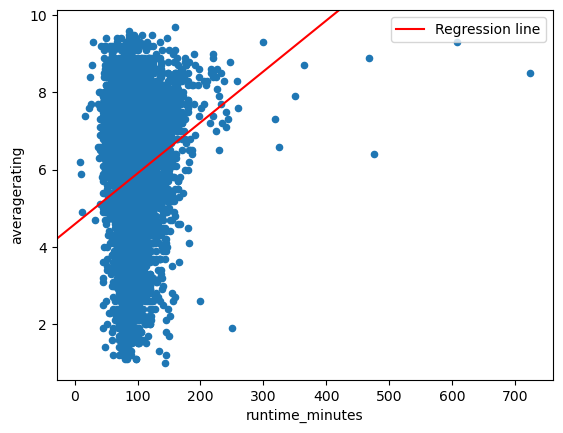

In [201]:
fig, ax = plt.subplots()
imdbdf.plot.scatter(x='runtime_minutes', y='averagerating', ax=ax)
sm.graphics.abline_plot(model_results=model_runtime, label="Regression line", ax=ax, color='red')
ax.legend()

<Axes: xlabel='runtime_minutes', ylabel='averagerating'>

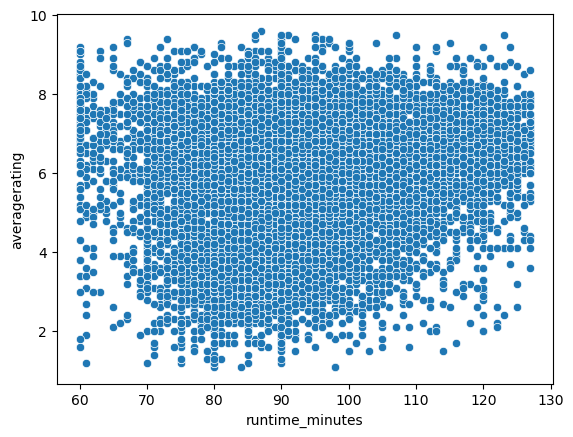

In [221]:
#remove runtime_minutes outliers and plot -- no correlation between runtime and rating
imdbdf_runtime = imdbdf
lower = imdbdf_runtime['runtime_minutes'].quantile(0.25) - 1.5 * (imdbdf_runtime['runtime_minutes'].quantile(0.75) - imdbdf_runtime['runtime_minutes'].quantile(0.25))
upper = imdbdf_runtime['runtime_minutes'].quantile(0.75) + 1.5 * (imdbdf_runtime['runtime_minutes'].quantile(0.75) - imdbdf_runtime['runtime_minutes'].quantile(0.25))
imdbdf_runtime = imdbdf_runtime[(imdbdf_runtime['runtime_minutes'] >= lower) & (imdbdf_runtime['runtime_minutes'] <= upper)]
sns.scatterplot(x='runtime_minutes', y='averagerating', data=imdbdf_runtime)

In [203]:
#rerun regression with without outliers
endog = imdbdf_runtime['averagerating']
exog = sm.add_constant(imdbdf_runtime['runtime_minutes'])
model_runtime_two = sm.OLS(endog, exog).fit()
model_runtime_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          averagerating   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     512.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.22e-112
Time:                        10:53:53   Log-Likelihood:                -31055.
No. Observations:               17728   AIC:                         6.211e+04
Df Residuals:                   17726   BIC:                         6.213e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.9872      0.080     49.982      0.000       3.831       4.144
runtime_minutes     0.0192      0.001     22.631      0.000       0.018       0.021
==============================================================================
Omnibus:                      289.165   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.695
Skew:                          -0.318   Prob(JB):                     1.86e-66
Kurtosis:                       2.927   Cond. No.                         717.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

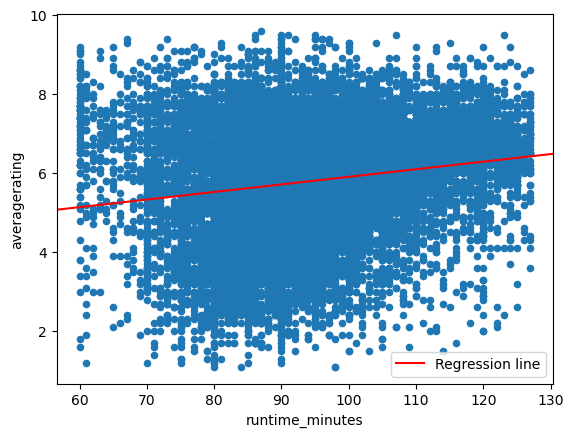

In [204]:
#plot runtime without outliers
fig, ax = plt.subplots()
imdbdf_runtime.plot.scatter(x='runtime_minutes', y='averagerating', ax=ax)
sm.graphics.abline_plot(model_results=model_runtime_two, label="Regression line", ax=ax, color='red')
ax.legend()

In [205]:
writer_directs = imdbdf[(imdbdf['wd_match'] == 1) & (imdbdf['numvotes'] >= 1000)].copy()
no_writer_directs = imdbdf[(imdbdf['wd_match'] == 0) & (imdbdf['numvotes'] >= 1000)].copy()

writer_only_dir = imdbdf[(imdbdf['w_only_d']) == 2 & (imdbdf['numvotes'] >= 1000)].copy()
writer_one_of_dir = imdbdf[(imdbdf['w_only_d'] == 1) & (imdbdf['numvotes'] >= 1000)].copy()


In [206]:
writer_directs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4097 entries, 0 to 18917
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         4097 non-null   object 
 1   primary_title    4097 non-null   object 
 2   original_title   4097 non-null   object 
 3   start_year       4097 non-null   int64  
 4   runtime_minutes  4097 non-null   float64
 5   genres           4097 non-null   object 
 6   averagerating    4097 non-null   float64
 7   numvotes         4097 non-null   int64  
 8   ordering         4097 non-null   int64  
 9   title            4097 non-null   object 
 10  region           4097 non-null   object 
 11  writer_name      4097 non-null   object 
 12  director_name    4097 non-null   object 
 13  wd_match         4097 non-null   int64  
 14  w_only_d         4097 non-null   int64  
 15  primary genre    4097 non-null   object 
dtypes: float64(2), int64(5), object(9)
memory usage: 544.1+ KB


In [207]:
writer_only_dir.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6452 entries, 7 to 18921
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         6452 non-null   object 
 1   primary_title    6452 non-null   object 
 2   original_title   6452 non-null   object 
 3   start_year       6452 non-null   int64  
 4   runtime_minutes  6452 non-null   float64
 5   genres           6452 non-null   object 
 6   averagerating    6452 non-null   float64
 7   numvotes         6452 non-null   int64  
 8   ordering         6452 non-null   int64  
 9   title            6452 non-null   object 
 10  region           6452 non-null   object 
 11  writer_name      6452 non-null   object 
 12  director_name    6452 non-null   object 
 13  wd_match         6452 non-null   int64  
 14  w_only_d         6452 non-null   int64  
 15  primary genre    6452 non-null   object 
dtypes: float64(2), int64(5), object(9)
memory usage: 856.9+ KB


In [208]:
writer_one_of_dir.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2569 entries, 0 to 18917
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         2569 non-null   object 
 1   primary_title    2569 non-null   object 
 2   original_title   2569 non-null   object 
 3   start_year       2569 non-null   int64  
 4   runtime_minutes  2569 non-null   float64
 5   genres           2569 non-null   object 
 6   averagerating    2569 non-null   float64
 7   numvotes         2569 non-null   int64  
 8   ordering         2569 non-null   int64  
 9   title            2569 non-null   object 
 10  region           2569 non-null   object 
 11  writer_name      2569 non-null   object 
 12  director_name    2569 non-null   object 
 13  wd_match         2569 non-null   int64  
 14  w_only_d         2569 non-null   int64  
 15  primary genre    2569 non-null   object 
dtypes: float64(2), int64(5), object(9)
memory usage: 341.2+ KB


In [209]:
writer_one_of_dir['averagerating'].mean()

6.161230050603348

In [210]:
writer_only_dir['averagerating'].mean()

5.987523248605084

In [211]:
no_writer_directs['averagerating'].mean()

6.081582840236686

In [212]:
writer_directs['averagerating'].mean()

6.144251891628021

In [280]:
test = stats.ttest_ind(writer_directs['averagerating'], no_writer_directs['averagerating'], equal_var=False, alternative = 'greater')
test

TtestResult(statistic=2.205143217120914, pvalue=0.01374151140659839, df=5818.032706215731)

In [288]:
test_dir = stats.ttest_ind(imdbdf_onedir['averagerating'], imdbdf_multdir['averagerating'], equal_var=True, alternative='greater')
test_dir

TtestResult(statistic=9.070418669934517, pvalue=6.823801624970963e-20, df=12261.0)

## Emily visualization section:

([0, 1, 2],
 [Text(0, 0, 'Writer is Only Director'),
  Text(1, 0, 'Writer is One of Many Directors'),
  Text(2, 0, 'Writer is Not a Director')])

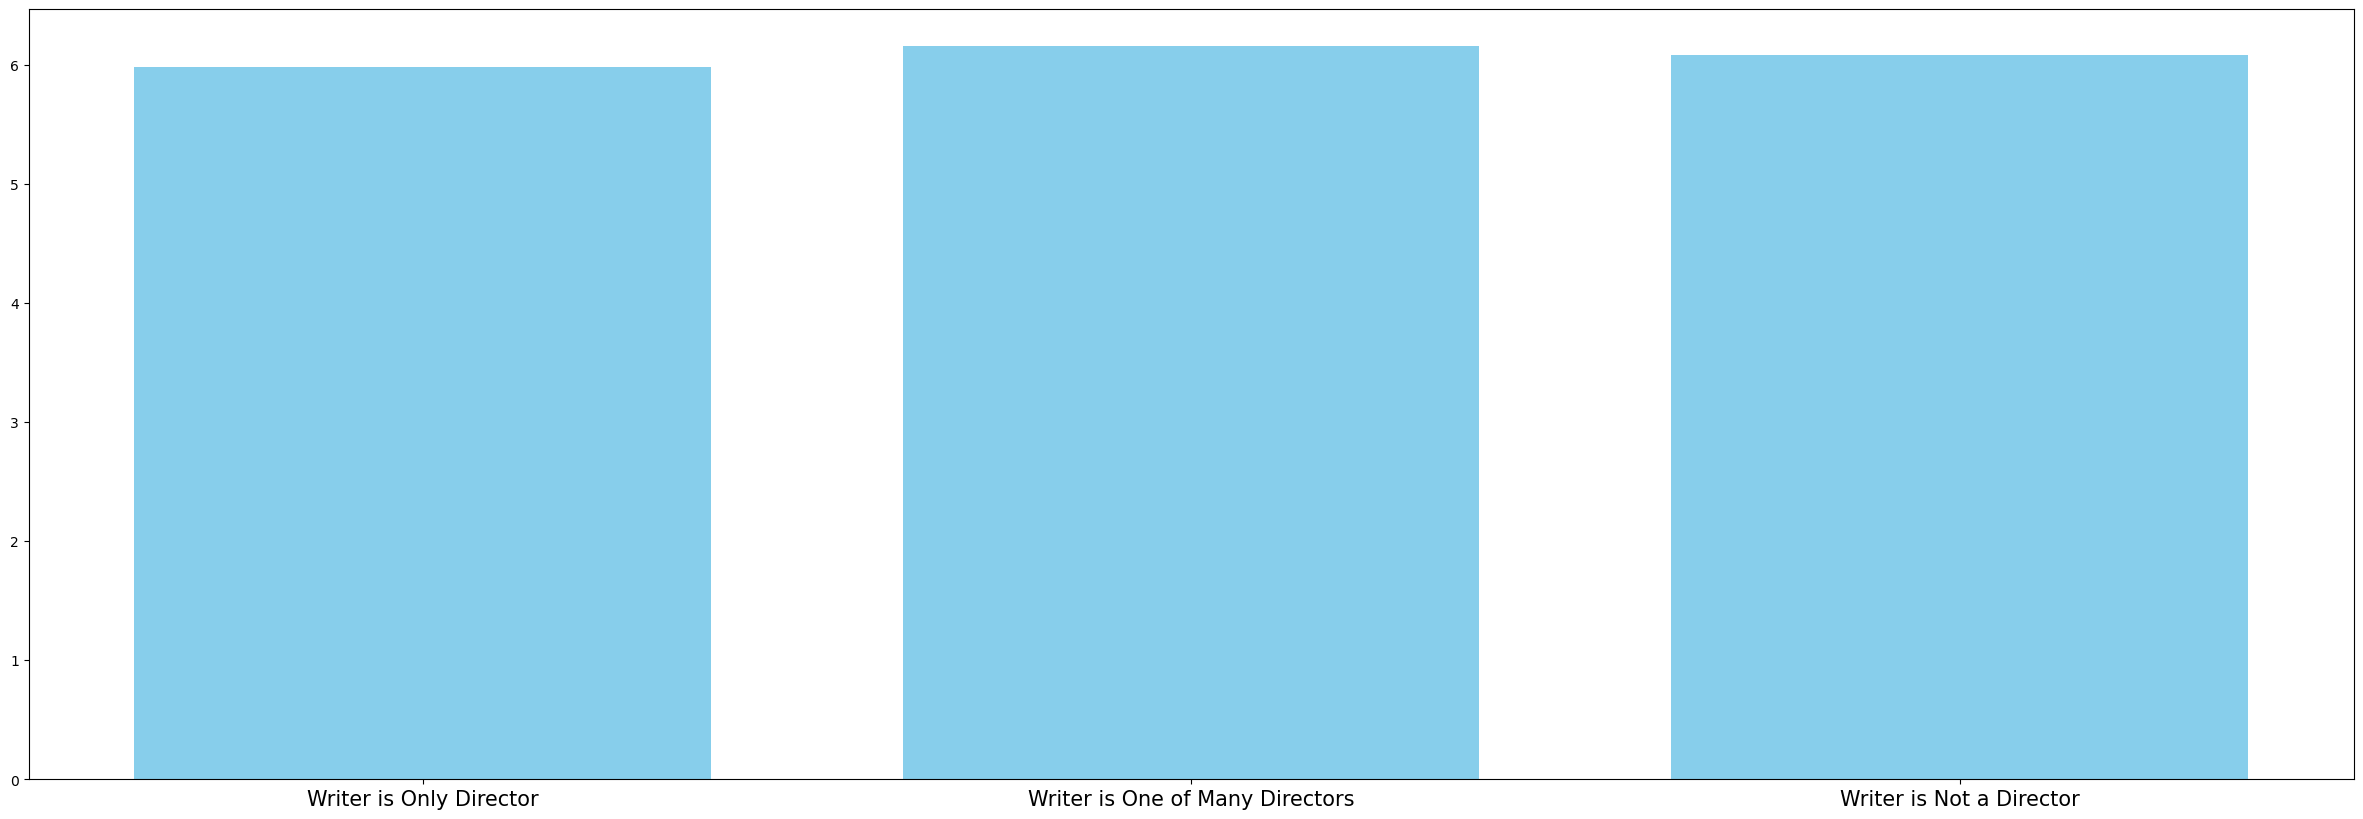

In [214]:
wdaverages = [writer_only_dir['averagerating'].mean(), writer_one_of_dir['averagerating'].mean(), no_writer_directs['averagerating'].mean()]
labels = ['Writer is Only Director', 'Writer is One of Many Directors', 'Writer is Not a Director']

plt.figure(figsize=(30,10))
plt.bar(labels, wdaverages, color='skyblue', width=0.75)
plt.xticks(fontsize=15)


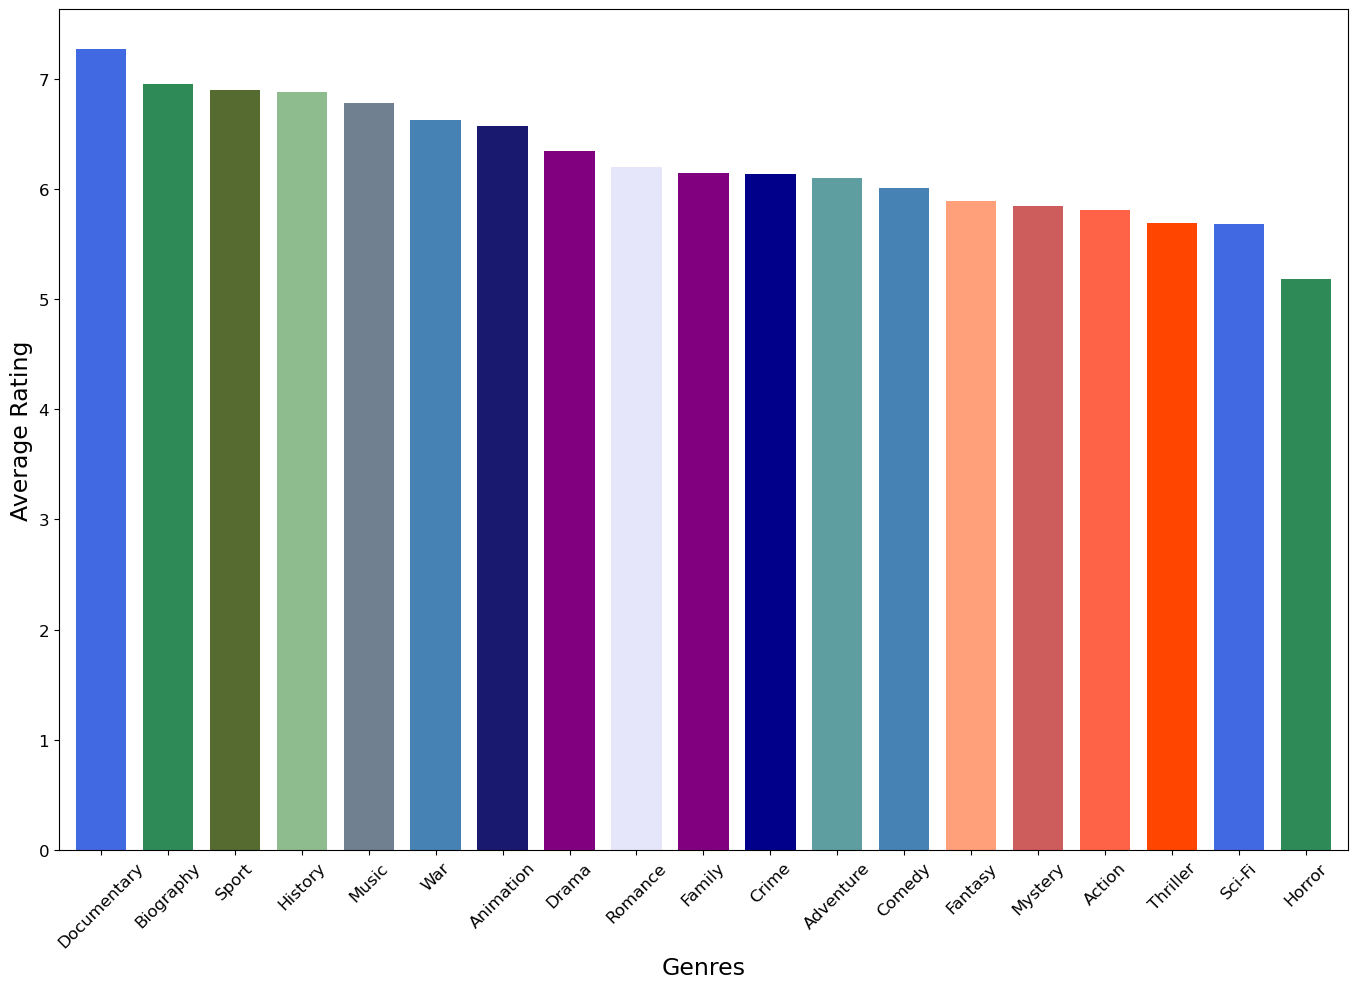

In [325]:
plt.figure(figsize=(13.68,10))

genrechart = genredf

colors = ['#4169E1', '#2E8B57', '#556B2F', '#8FBC8F', '#708090', '#4682B4', '#191970', '#800080', '#E6E6FA', '#800080', '#00008B', '#5F9EA0', '#4682B4', '#FFA07A', '#CD5C5C', '#FF6347', '#FF4500']


genrechart['averagerating'].plot(kind='bar', color=colors, width=0.75)
plt.xlabel('Genres', fontsize=17)
plt.ylabel('Average Rating', fontsize=17)
#plt.title('Avg. Rating by Genre', fontsize=40)
plt.xticks(rotation=45, fontsize=12) 
plt.yticks(rotation=0, fontsize=12) 
plt.tight_layout()
plt.show()

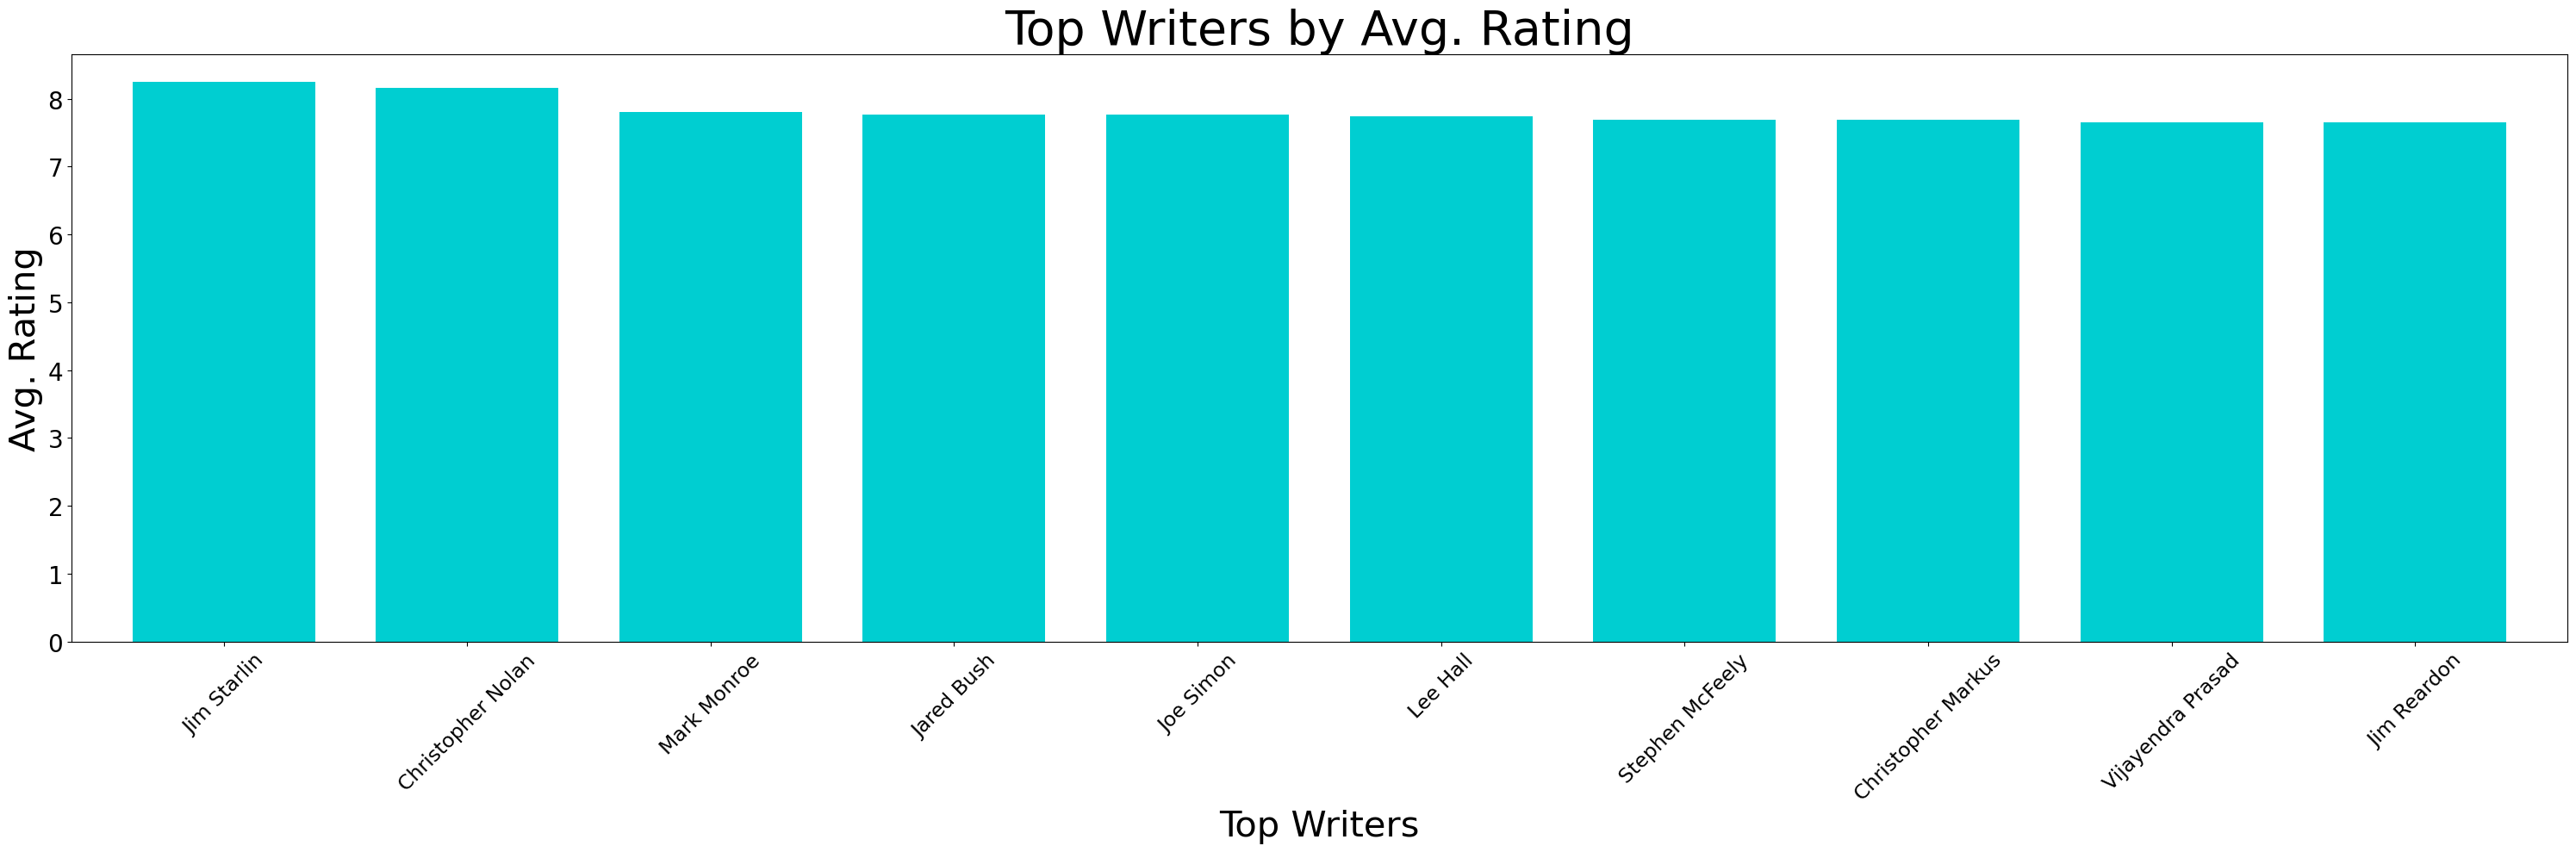

In [241]:
plt.figure(figsize=(30,10))

writersratingschart = writersratings.head(10)
writersratingschart.set_index('writer_name', inplace=True)
writersratingschart['averagerating'].plot(kind='bar', color='darktorqui', width=0.75)
plt.xlabel('Top Writers', fontsize=30)
plt.ylabel('Avg. Rating', fontsize=30)
plt.title('Top Writers by Avg. Rating', fontsize=40)
plt.xticks(rotation=45, fontsize=17) 
plt.yticks(rotation=0, fontsize=20) 
plt.tight_layout()
plt.show()

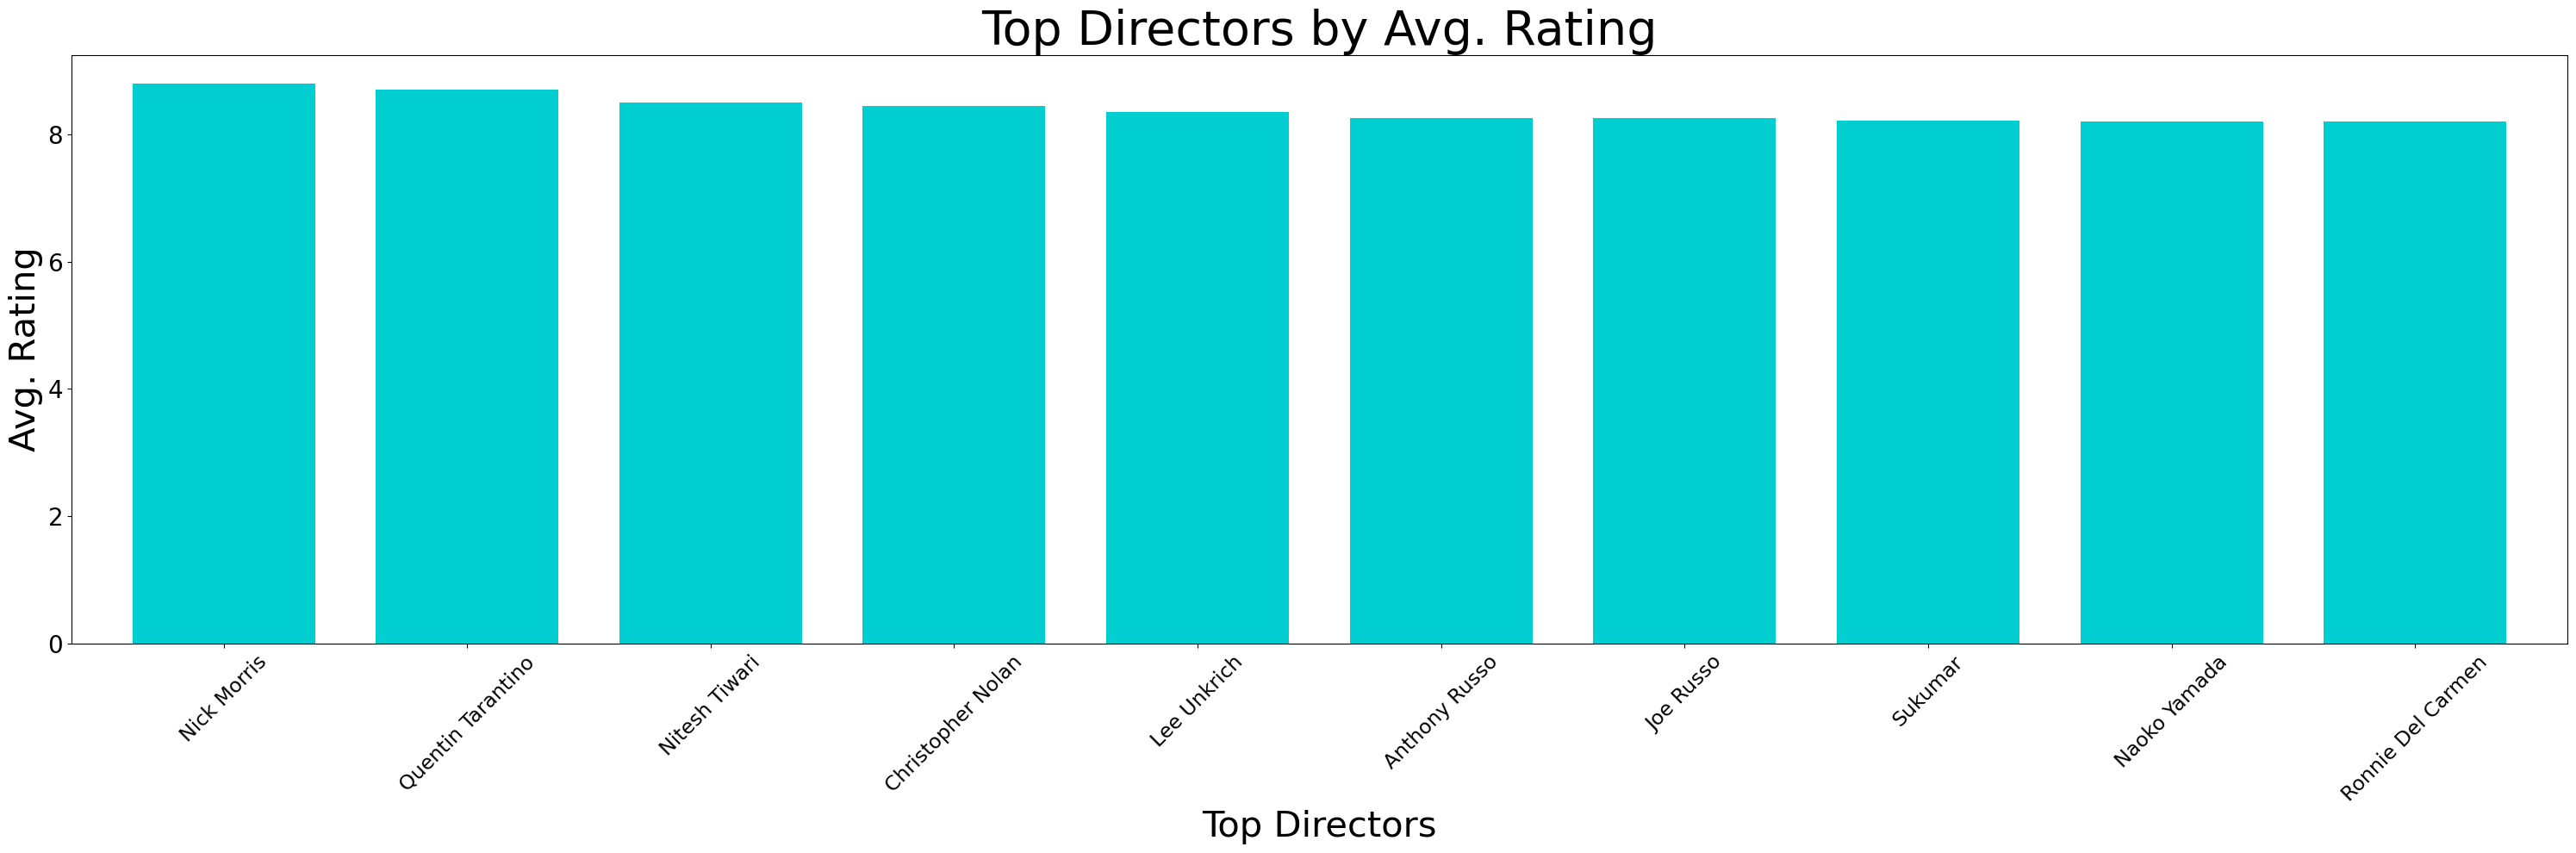

In [239]:
plt.figure(figsize=(30,10))

directorsratingschart = directorsratings.head(10)
directorsratingschart.set_index('director_name', inplace=True)
directorsratingschart['averagerating'].plot(kind='bar', color='darkturquoise', width=0.75)
plt.xlabel('Top Directors', fontsize=30)
plt.ylabel('Avg. Rating', fontsize=30)
plt.title('Top Directors by Avg. Rating', fontsize=40)
plt.xticks(rotation=45, fontsize=17) 
plt.yticks(rotation=0, fontsize=20) 
plt.tight_layout()
plt.show()

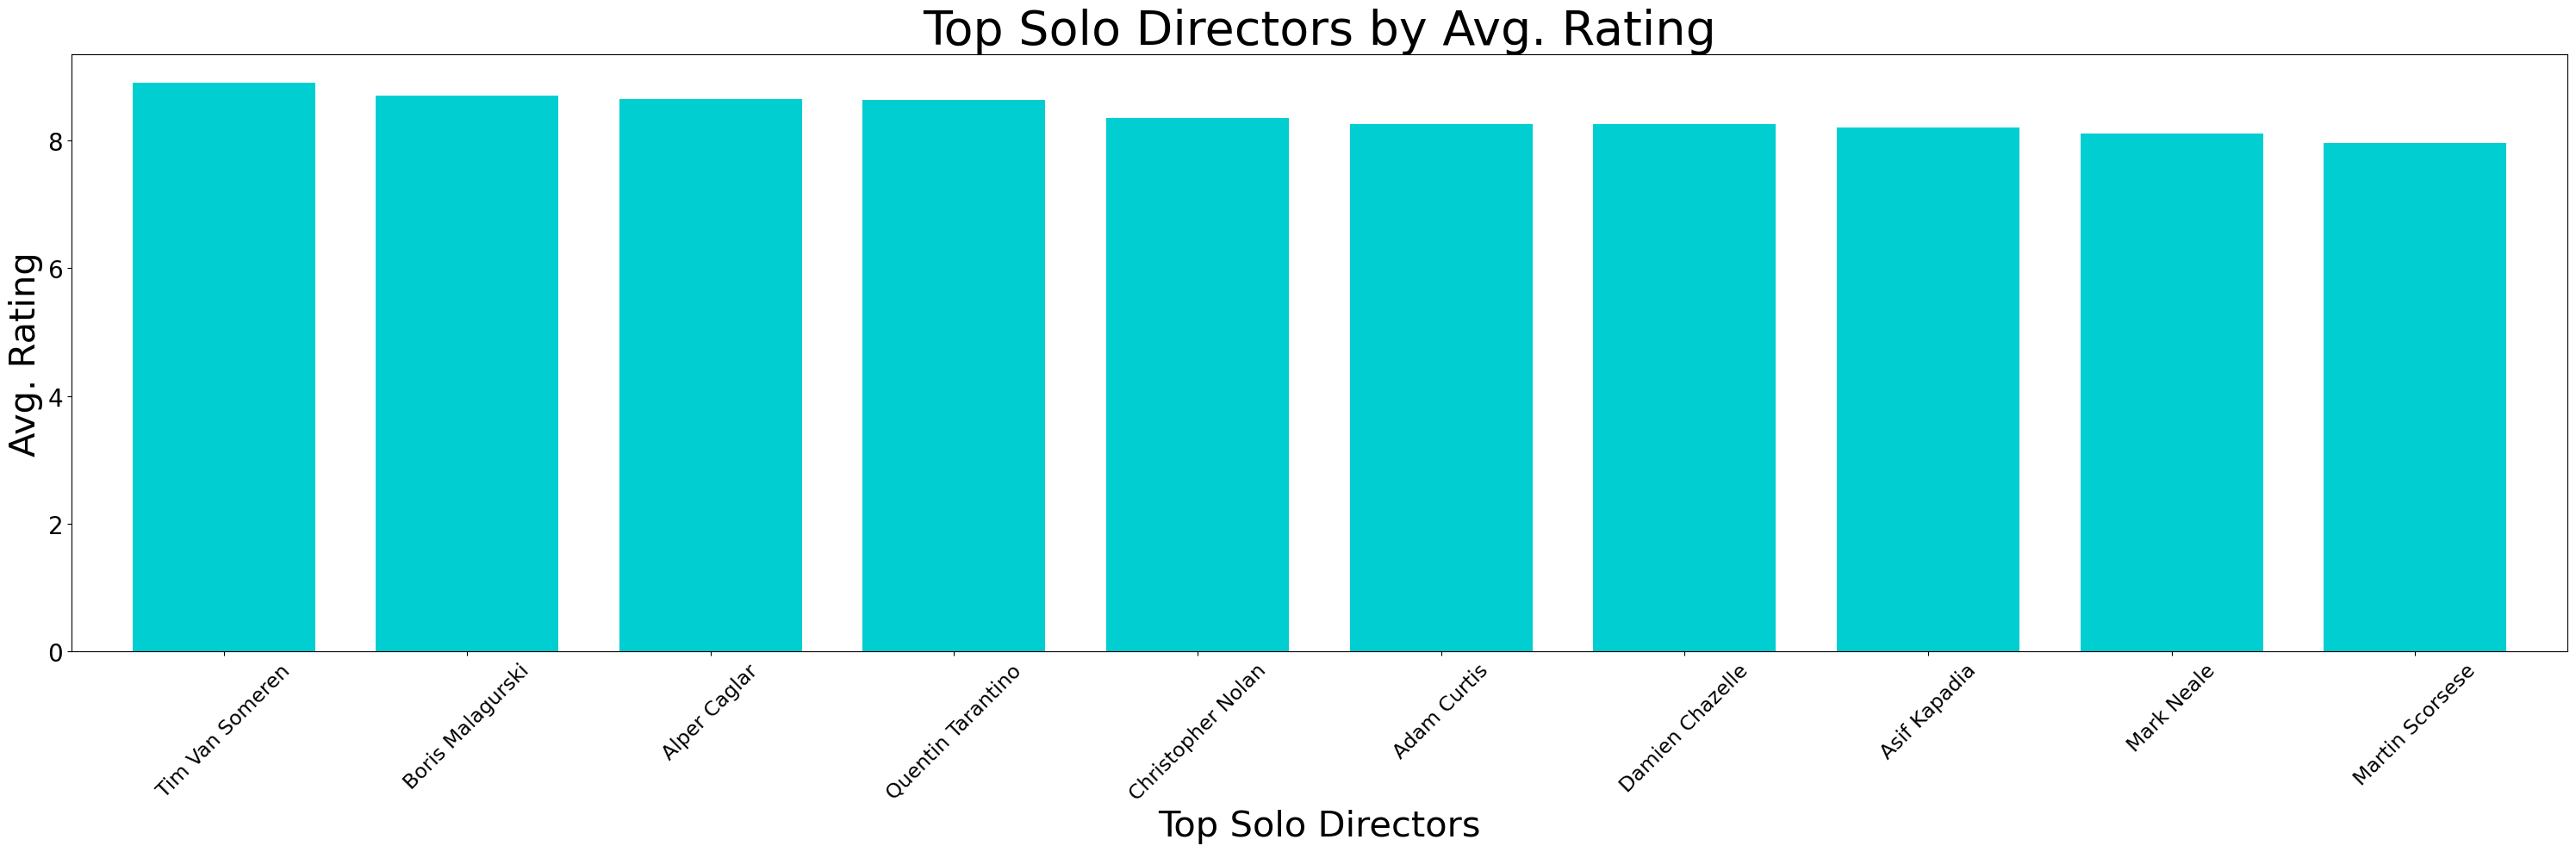

In [279]:
plt.figure(figsize=(30,10))

onedirchart = imdbdf_onedir_avgrat.head(10)
#onedirchart.set_index('director_name', inplace=True)
onedirchart['averagerating'].plot(kind='bar', color='darkturquoise', width=0.75)
plt.xlabel('Top Solo Directors', fontsize=30)
plt.ylabel('Avg. Rating', fontsize=30)
plt.title('Top Solo Directors by Avg. Rating', fontsize=40)
plt.xticks(rotation=45, fontsize=17) 
plt.yticks(rotation=0, fontsize=20) 
plt.tight_layout()
plt.show()

## Reid's (archived) SQL Code:

In [218]:
#examining the tables within the IMDb SQL database
df = pd.read_sql(
    """
    SELECT *
    FROM sqlite_master
    """
, conn
)

df[df['type'] == 'table']

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [219]:
pd.read_sql("""
    SELECT *
    FROM movie_basics
    JOIN movie_ratings
        USING (movie_id)
    JOIN known_for
        USING (movie_id)
    LIMIT 10
    --WHERE start_year = 2013

""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm1194313
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm1391276
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,nm0000953
3,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,nm0462648
4,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,nm0600800
5,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,nm0613657
6,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,nm0869470
7,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,nm0919912
8,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,nm1152466
9,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,nm1475059


In [220]:
pd.read_sql("""
    SELECT primary_title, primary_name
    FROM persons
    JOIN known_for
        USING (person_id)
    JOIN movie_basics
        USING (movie_id)
    LIMIT 30
    --ORDER BY primary_title DESC

""", conn)

,primary_title,primary_name
0,Hotel Transylvania,Mary Ellen Bauder
1,Smurfs: The Lost Village,Mary Ellen Bauder
2,Playback,Joseph Bauer
3,Totem,Joseph Bauer
4,Racing Extinction,Axel Baumann
5,Mission Blue,Axel Baumann
6,The Rocket,Pete Baxter
7,No Other Woman,Ruel S. Bayani
8,One More Try,Ruel S. Bayani
9,Five Heroes Get Together,Bayou
